In [6]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from collections import defaultdict

import plotly.graph_objects as go


In [2]:
with open('first_exp.pkl', 'rb') as file:
    mul_independent = pickle.load(file)

with open('second_exp.pkl', 'rb') as file:
    mul = pickle.load(file)

In [17]:
def best_rez(df):
    return np.min(df.values)
def get_best_params(dataframe, acc):
    ind = np.unravel_index(dataframe.values.argmin(), dataframe.values.shape)
    ret = { 'miss_rate': best_rez(dataframe),
            'gamma': float(dataframe.columns[ind[1]]), 
            'beta' : float(dataframe.index[ind[0]]),
            'acc': float(acc)
        }
    return ret

def acceleration(lru_best, alg_best):
    return ((1 - alg_best) - (1 - lru_best))/(1 - lru_best)

mul_dict = mul[2]
indep_dict = mul_independent[1]

keys = np.array(list(mul_dict.keys() ) )

dicts = [mul_dict, indep_dict]
accelerations = [0, 0]
best_params = [_, _]
accepted_keys = []
for i, d in enumerate(dicts):
    tmp = [d[tuple(key)] for key in keys]
    accelerations[i] = [acceleration(elem[0]['LRU_miss_rate'], best_rez(elem[1])) for elem in tmp]
    best_params[i]   = [get_best_params(elem[1],acc) for elem, acc in zip(tmp, accelerations[i])]
    # for j, key in enumerate(keys):
        # tmp_dict[key][i] = accelerations[i][j]
accelerations = np.array(accelerations)

In [4]:
mul_dict[(100000, 1000, 10, 0.01, 2)][1]

,2.00e-01,6.59e-02,2.17e-02,7.17e-03,2.36e-03,7.79e-04,2.57e-04,8.47e-05,2.79e-05,9.20e-06,3.03e-06,1.00e-06
1.01e+00,0.73887,0.74190,0.74425,0.74340,0.74018,0.73359,0.73134,0.73605,0.73082,0.72923,0.73106,0.73193
1.05e+00,0.73549,0.72069,0.73716,0.75199,0.73743,0.72858,0.72851,0.73275,0.72725,0.72813,0.72830,0.72825
1.09e+00,0.72019,0.72056,0.72969,0.73849,0.73983,0.73114,0.73086,0.74410,0.72833,0.72776,0.72814,0.72855
1.13e+00,0.71534,0.71854,0.72231,0.72491,0.73654,0.73820,0.74200,0.72807,0.72764,0.72804,0.72821,0.72816
1.17e+00,0.71141,0.71704,0.71709,0.71818,0.72985,0.73169,0.73861,0.72794,0.72802,0.72707,0.72857,0.72810
1.21e+00,0.71186,0.71714,0.71655,0.71371,0.72170,0.72403,0.73121,0.72837,0.72849,0.72749,0.72845,0.72803
1.25e+00,0.70917,0.71440,0.71187,0.71020,0.71589,0.72082,0.72654,0.72835,0.72840,0.72813,0.72823,0.72793
1.30e+00,0.70998,0.71198,0.70880,0.70915,0.71327,0.71782,0.72243,0.72825,0.72770,0.72820,0.72758,0.72777


In [61]:
df = pd.DataFrame()

filter_ind = (keys[:, 2] == 100) & (keys[:, 1] == 1000) & (keys[:, 3] > 0.01)

df['x'] = [ str(tuple(tt[3:])) for tt in keys[filter_ind]]
df['mean compare'] = accelerations[0][filter_ind]
df['independent weight'] = accelerations[1][filter_ind] 
mmin = np.min(accelerations[:,filter_ind])
mmax = np.max(accelerations)
# fig = plt.Figure(figsize=(20, 15))
fig = px.bar(data_frame= df, y = 'x' , x =  ['mean compare', 'independent weight'], \
            orientation='h', barmode='group', opacity= 0.8) #, title="Algorithms acceleration with n_iters = 10^5, N = 1000, k = 100") 
fig = fig.update_traces(textfont_size=20)
fig.show()

1) ускорить работу алгоритма
2) найти датасет
3) подумать над подбором параметров
4) как поддерживать перцентиль в онлайн режиме
50

## best parameters

In [19]:
def describe_metr(elem):
    # print(elem)
    return {'acc': elem['acc'],
            'metrics': -np.log(elem['beta'])/ np.log(1 - elem['gamma'])
            }
param_metr = [[describe_metr(elem) for elem in dct] for dct in best_params] 

In [49]:
df = pd.DataFrame()

filter_ind = (keys[:, 2] == 100) & (keys[:, 1] == 1000) & (keys[:, 3] > 0.01)

df['x'] = [ str(tuple(tt[1:])) for tt in keys[filter_ind]]
df['mean compare'] = [param_metr[0][ind]['metrics'] for ind in np.where(filter_ind != 0)[0] ]
df['independent weight'] =  [param_metr[1][ind]['metrics'] for ind in np.where(filter_ind != 0)[0] ]
mmin = np.min(accelerations[:,filter_ind])
mmax = np.max(accelerations)
# fig = plt.Figure(figsize=(20, 15))
px.bar(data_frame= df, y = 'x' , x =  [ 'mean compare', 'independent weight'], \
            orientation='h', barmode='group', opacity= 0.8) 

In [45]:
[best_params[1][ind] for ind in np.where(filter_ind != 0)[0]]

[{'miss_rate': 0.41973,
  'gamma': 0.00158,
  'beta': 1.65,
  'acc': 0.05186165391726792},
 {'miss_rate': 0.44576,
  'gamma': 0.00158,
  'beta': 1.8,
  'acc': 0.008626023657870933},
 {'miss_rate': 0.45786,
  'gamma': 0.00631,
  'beta': 1.05,
  'acc': -0.005320710406575486},
 {'miss_rate': 0.47154,
  'gamma': 0.0251,
  'beta': 1.05,
  'acc': -0.009873906282202813},
 {'miss_rate': 0.66679,
  'gamma': 0.00158,
  'beta': 1.65,
  'acc': 0.07779143485573818},
 {'miss_rate': 0.6761,
  'gamma': 0.00158,
  'beta': 1.8,
  'acc': 0.05292243677264145},
 {'miss_rate': 0.6933,
  'gamma': 0.00158,
  'beta': 1.26,
  'acc': -0.0010748135361367047},
 {'miss_rate': 0.69626,
  'gamma': 0.00631,
  'beta': 1.37,
  'acc': -0.0023976089598318666}]

In [54]:
keys[filter_ind]

array([[1.e+05, 1.e+03, 1.e+02, 5.e-02, 2.e+00],
       [1.e+05, 1.e+03, 1.e+02, 5.e-02, 4.e+00],
       [1.e+05, 1.e+03, 1.e+02, 5.e-02, 1.e+01],
       [1.e+05, 1.e+03, 1.e+02, 5.e-02, 2.e+01],
       [1.e+05, 1.e+03, 1.e+02, 1.e-01, 2.e+00],
       [1.e+05, 1.e+03, 1.e+02, 1.e-01, 4.e+00],
       [1.e+05, 1.e+03, 1.e+02, 1.e-01, 1.e+01],
       [1.e+05, 1.e+03, 1.e+02, 1.e-01, 2.e+01]])

[-0.49821881]


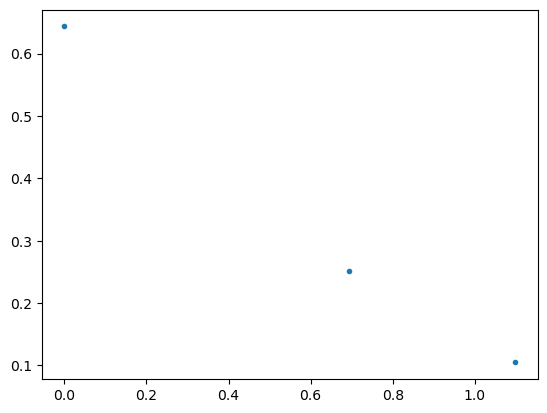

In [ ]:
from scipy.stats import zipf
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor, LinearRegression
distr = zipf(7.)
sample = distr.rvs(5000)
counts = Counter(sample)
counts = dict(filter(lambda x: x[1] > 1, counts.items()))
X = np.log(np.array(list(counts.keys()))).reshape(-1, 1)
y = np.log(np.array(list(counts.values())))
y = y / np.sum(y)


model = LinearRegression().fit(X, y)
print(model.coef_)
plt.plot(X, y, '.')
